In [4]:
import pandas as pd

# Load the datasets
classes_df = pd.read_csv('elliptic_txs_classes.csv')
edges_df = pd.read_csv('elliptic_txs_edgelist.csv')
features_df = pd.read_csv('elliptic_txs_features.csv')

# Check the first few rows of each dataframe
print("Classes Data:")
print(classes_df.head())

print("\nEdges Data:")
print(edges_df.head())

print("\nFeatures Data:")
print(features_df.head())


Classes Data:
        txId    class
0  230425980  unknown
1    5530458  unknown
2  232022460  unknown
3  232438397        2
4  230460314  unknown

Edges Data:
       txId1      txId2
0  230425980    5530458
1  232022460  232438397
2  230460314  230459870
3  230333930  230595899
4  232013274  232029206

Features Data:
   230425980  1  -0.1714692896288031  -0.18466755143291433  \
0    5530458  1            -0.171484             -0.184668   
1  232022460  1            -0.172107             -0.184668   
2  232438397  1             0.163054              1.963790   
3  230460314  1             1.011523             -0.081127   
4  230459870  1             0.961040             -0.081127   

   -1.2013688016765636  -0.12196959975910057  -0.04387454791734898  \
0            -1.201369             -0.121970             -0.043875   
1            -1.201369             -0.121970             -0.043875   
2            -0.646376             12.409294             -0.063725   
3            -1.201369      

In [6]:
# Check column names in features_df and classes_df
print("Features DataFrame columns:", features_df.columns)
print("Classes DataFrame columns:", classes_df.columns)


Features DataFrame columns: Index(['230425980', '1', '-0.1714692896288031', '-0.18466755143291433',
       '-1.2013688016765636', '-0.12196959975910057', '-0.04387454791734898',
       '-0.11300200928476244', '-0.06158379407303222', '-0.16209679981659642',
       ...
       '-0.5621534802884299', '-0.6009988905192808', '1.4613303209554889',
       '1.4613689382001922', '0.01827940003744589', '-0.0874901561101501',
       '-0.13115530389558736', '-0.09752359377152515', '-0.12061340670311574',
       '-0.11979245961251665'],
      dtype='object', length=167)
Classes DataFrame columns: Index(['txId', 'class'], dtype='object')


In [7]:
# Rename the first column of features_df to 'txId'
features_df.rename(columns={features_df.columns[0]: 'txId'}, inplace=True)

# Now merge the datasets on 'txId'
df = pd.merge(features_df, classes_df, on='txId', how='left')

# Filter out 'unknown' classes
df_filtered = df[df['class'] != 'unknown']

# Check the results
print(df_filtered.head())


         txId  1  -0.1714692896288031  -0.18466755143291433  \
2   232438397  1             0.163054              1.963790   
8   232029206  1            -0.005027              0.578941   
9   232344069  1            -0.147852             -0.184668   
10   27553029  1            -0.151357             -0.184668   
15    3881097  1            -0.172306             -0.184668   

    -1.2013688016765636  -0.12196959975910057  -0.04387454791734898  \
2             -0.646376             12.409294             -0.063725   
8             -0.091383              4.380281             -0.063725   
9             -1.201369             -0.121970             -0.043875   
10            -1.201369             -0.121970             -0.043875   
15            -1.201369              0.028105             -0.043875   

    -0.11300200928476244  -0.06158379407303222  -0.16209679981659642  ...  \
2               9.782742             12.414558             -0.163645  ...   
8               4.667146              0.

In [8]:
# Check for missing values
missing_values = df_filtered.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [9]:
from sklearn.preprocessing import StandardScaler

# Normalize the features (excluding the 'txId' and 'class' columns)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_filtered.iloc[:, 1:-1])

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(features_scaled, columns=df_filtered.columns[1:-1])
df_scaled['class'] = df_filtered['class'].values  # Add the class back


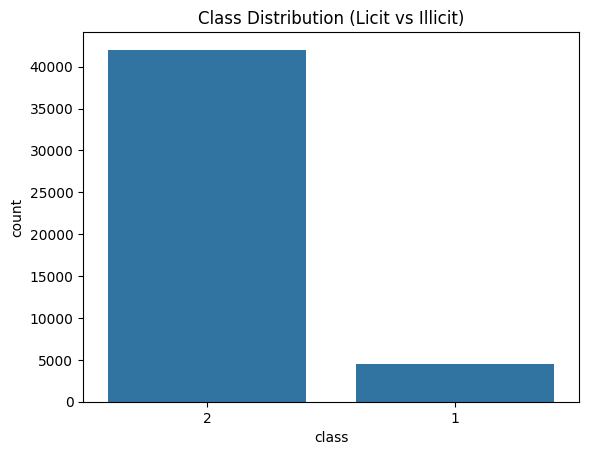

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution
sns.countplot(x='class', data=df_filtered)
plt.title('Class Distribution (Licit vs Illicit)')
plt.show()


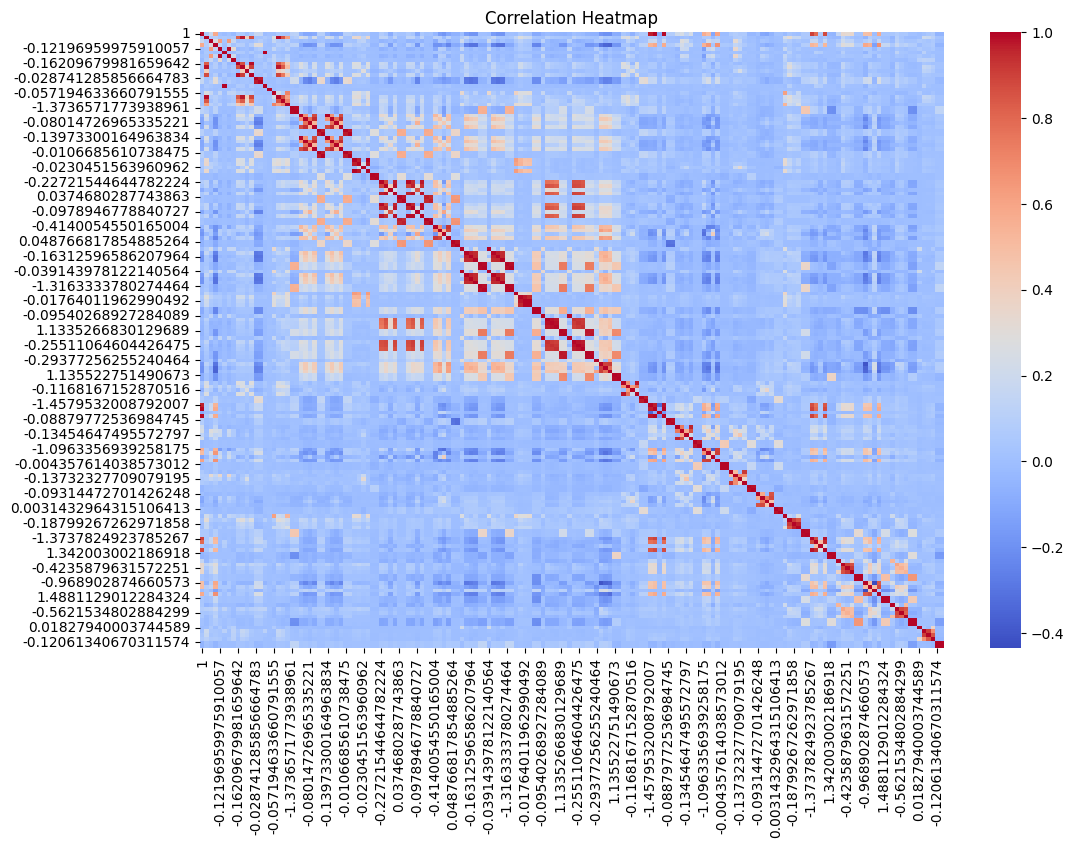

In [12]:
# Compute the correlation matrix
corr_matrix = df_filtered.iloc[:, 1:-1].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [14]:
print(df_filtered.columns)


Index(['txId', '1', '-0.1714692896288031', '-0.18466755143291433',
       '-1.2013688016765636', '-0.12196959975910057', '-0.04387454791734898',
       '-0.11300200928476244', '-0.06158379407303222', '-0.16209679981659642',
       ...
       '-0.6009988905192808', '1.4613303209554889', '1.4613689382001922',
       '0.01827940003744589', '-0.0874901561101501', '-0.13115530389558736',
       '-0.09752359377152515', '-0.12061340670311574', '-0.11979245961251665',
       'class'],
      dtype='object', length=168)


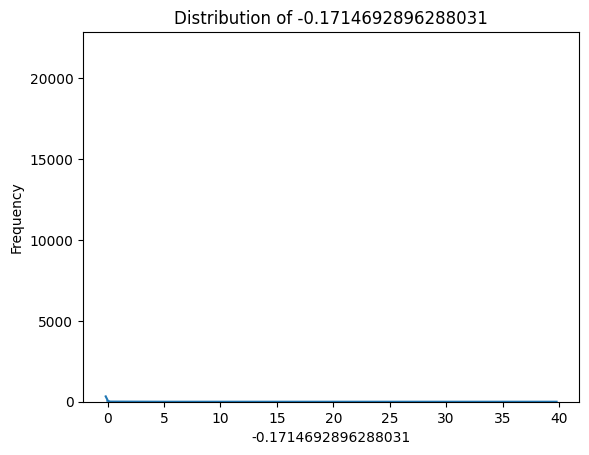

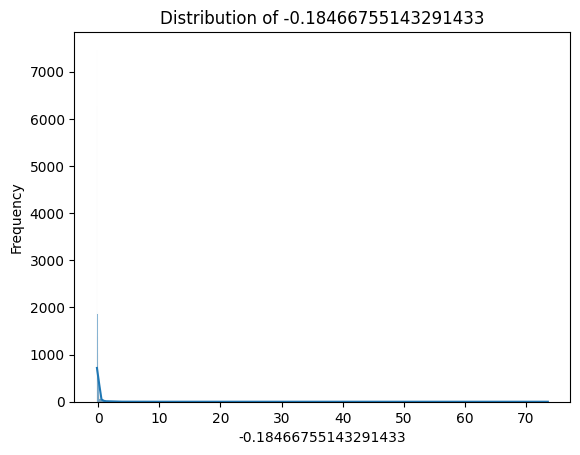

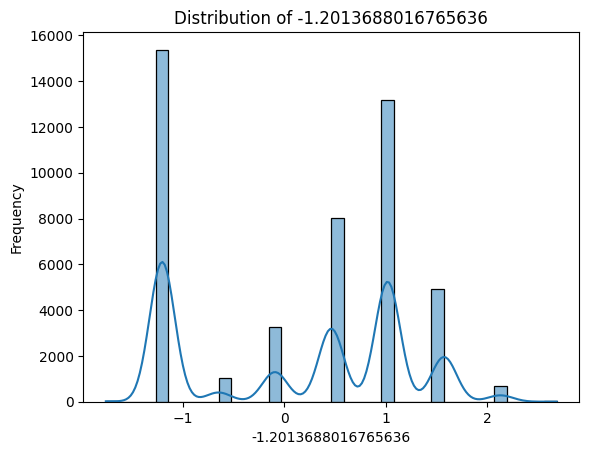

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected features
selected_features = ['-0.1714692896288031', '-0.18466755143291433', '-1.2013688016765636']

# Plot histograms for each feature
for feature in selected_features:
    sns.histplot(df_filtered[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')
    plt.show()
